Calculate GINI values with different ratios of instances

In [65]:
import pandas as pd

dataset = 'relathe'

def get_test_acc(dataset, proportion):
    for seed in range(5):
        if proportion == 'all' :
            result = pd.read_csv('Response/Review1/All_initialized/{}_{}.csv'.format(dataset, seed))
        else:
            result = pd.read_csv('Response/Review1/GINI_sampling/{}_{}_{}.csv'.format(dataset, int(100 * (1 - proportion)), seed))

        if seed == 0:
            train_acc = result['train_acc'].to_numpy()
            test_acc = result['test_acc'].to_numpy()
        else:
            train_acc += result['train_acc'].to_numpy()
            test_acc += result['test_acc'].to_numpy() 

    train_acc /= 5
    test_acc /= 5

    return train_acc, test_acc



In [66]:
_, test_acc_10 = get_test_acc(dataset=dataset, proportion=0.9)
_, test_acc_30 = get_test_acc(dataset=dataset, proportion=0.7)
_, test_acc_50 = get_test_acc(dataset=dataset, proportion=0.5)
_, test_acc_70 = get_test_acc(dataset=dataset, proportion=0.3)
_, test_acc_90 = get_test_acc(dataset=dataset, proportion=0.1)
_, test_acc_100 = get_test_acc(dataset=dataset, proportion='all')



In [67]:
import numpy as np
from matplotlib import pyplot as plt

total_epoch = 60
end = total_epoch - 10 + 1

def moving_average(x):
    w = 10
    x = np.array(x).flatten()
    return np.convolve(x, np.ones(w), 'valid') / w


def plot_moving_acc(test_acc_10, test_acc_30, test_acc_50, test_acc_70, test_acc_90, test_acc_100):
    x = np.arange(total_epoch)
    plt.figure(1)
    plt.plot(x[:end], moving_average(test_acc_10), label='0.1')
    plt.plot(x[:end], moving_average(test_acc_30), label='0.3')
    plt.plot(x[:end], moving_average(test_acc_50), label='0.5')
    plt.plot(x[:end], moving_average(test_acc_70), label='0.7')
    plt.plot(x[:end], moving_average(test_acc_90), label='0.9')
    plt.plot(x[:end], moving_average(test_acc_100), label='1.0')

    plt.xlabel('epoch')
    plt.ylabel('Test Acc')
    plt.title('Test Acc of {} dataset with different ratios'.format(dataset))
    plt.legend()
    plt.show()

    plt.close()


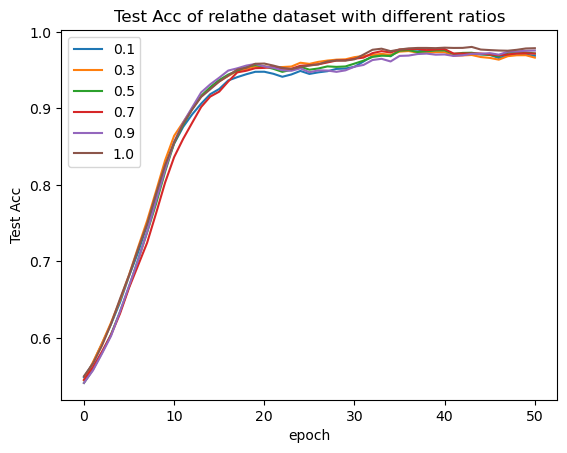

In [68]:
plot_moving_acc(test_acc_10, test_acc_30, test_acc_50, test_acc_70, test_acc_90, test_acc_100)

In [69]:
epoch = 60

print('test_acc_10', np.average(test_acc_10[epoch-5:epoch]))
print('test_acc_30', np.average(test_acc_30[epoch-5:epoch]))
print('test_acc_50', np.average(test_acc_50[epoch-5:epoch]))
print('test_acc_70', np.average(test_acc_70[epoch-5:epoch]))
print('test_acc_90', np.average(test_acc_90[epoch-5:epoch]))
print('test_acc_100', np.average(test_acc_100[epoch-5:epoch]))



test_acc_10 0.9714685314685315
test_acc_30 0.9744055944055944
test_acc_50 0.9793006993006992
test_acc_70 0.979020979020979
test_acc_90 0.9786013986013986
test_acc_100 0.9850349650349649
